# **Chapter 3. Python 을 활용한 데이터 전처리** 





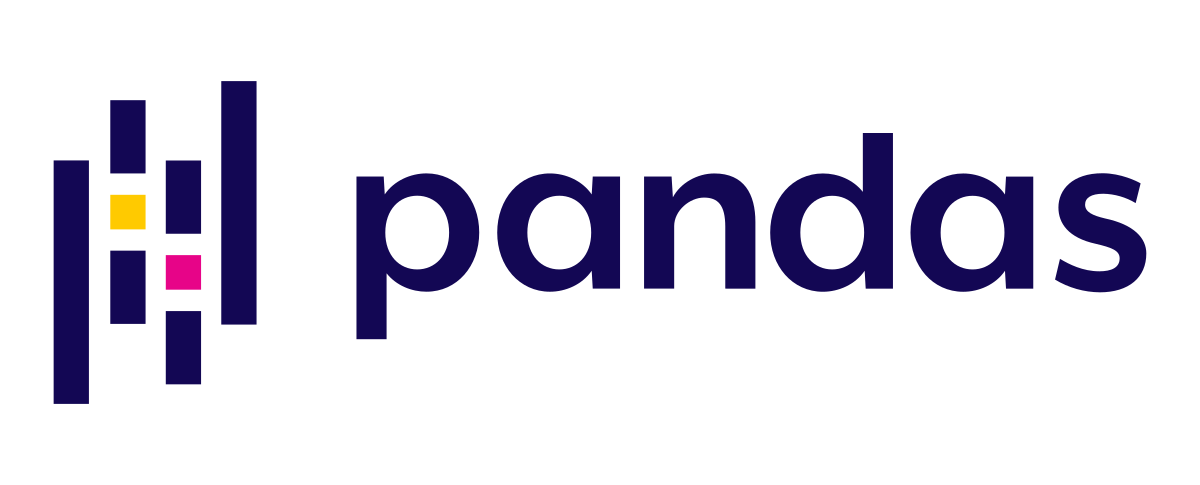


---
### **학습 목표**
> 3-4. Pandas 란? <br>
> 3-5. csv, excel 파일 읽고 쓰기, 요약 정보 한눈에 확인하기 <br>
> 3-6. 데이터 슬라이싱을 통해 Pandas 익숙해지기 <br>
> 3-7. 통계값 계산 및 정렬 방법 익히기 <br>
> 3-8. 피벗 테이블(pivot table) 기능과 그룹 통계(groupby) <br>
> 3-9. 데이터 합치기 (Join 과 Merge, Concat) <br>
> 3-10. 자료형 변환, 산술 연산 <br>
> 3-11. 전처리의 기본! 결측값, 중복 처리 <br>
> 3-12. 고급 기능 (apply, lambda, map) 으로 나도 이제 Pandas 고수! <br>
> **3-13. Pandas 시각화로 멋지게 레포팅하자** <br>
> 3-14. 실습 예제 <br>

## 3-13. Pandas 시각화

> Colab 한글 깨짐 현상 해결 방법
> - Step 1. 폰트 설치 (아래 코드 실행)
> - Step 2. 런타임 재시작 (런타임 > 런타임 다시 시작)
> - Step 3. 라이브러리 임포트 (폰트 설치 이후 코드 실행)

In [2]:
# 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq
!rm ~/.cache/matplotlib -rf

Selecting previously unselected package fonts-nanum.
(Reading database ... 155320 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [3]:
# 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.font_manager as fm
import matplotlib as mpl 
import numpy as np
import seaborn as sns

# 폰트 설정
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=20).get_name() # 기본 폰트 사이즈 : 20
plt.rc('font', family=font_name)
fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False
%matplotlib inline

In [11]:
# 실습 파일 로딩 (펭귄, 타이타닉)
df1 = sns.load_dataset("penguins")
df1 = df1[['species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']]
df1 = df1.dropna().reset_index(drop=True)
df2 = sns.load_dataset("titanic")

In [12]:
df1

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm
0,Adelie,Torgersen,39.1,18.7,181.0
1,Adelie,Torgersen,39.5,17.4,186.0
2,Adelie,Torgersen,40.3,18.0,195.0
3,Adelie,Torgersen,36.7,19.3,193.0
4,Adelie,Torgersen,39.3,20.6,190.0
...,...,...,...,...,...
337,Gentoo,Biscoe,47.2,13.7,214.0
338,Gentoo,Biscoe,46.8,14.3,215.0
339,Gentoo,Biscoe,50.4,15.7,222.0
340,Gentoo,Biscoe,45.2,14.8,212.0


In [13]:
df2

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


> ###  **3-13-1. plot 함수**


> - `plot` 은 **데이터 집합을 도표나 그래프로 표시하는 것**을 의미합니다.
> - 파이썬에서는 matplotlib, seaborn, pyplot 등 **여러 라이브러리에서 시각화 코딩을 할때 자주 사용되는 개념**입니다.
> - Pandas 의 plot 은 **matplotlib 의 plot 을 임포트**해서 사용하는 것입니다.
> - Pandas 의**`plot` 함수는 `kind` 라는 옵션**으로 **다양한 그래프를 시각화** 할 수 있습니다.
> - `kind` 옵션 인자값
    - 라인형(`line`), 바형 (`bar`),  히스토그램(`hist`), 박스형(`box`), 파이형(`pie`), 산점도(`scatter`), 영역형(`area`)

> **1. 라인 (`line`)**

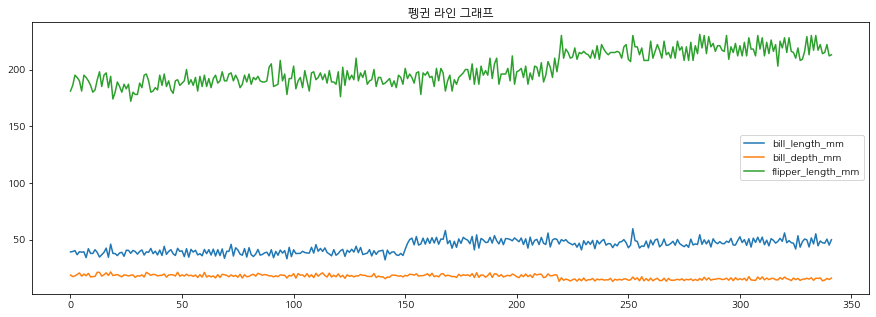

In [14]:
df1.plot(kind='line', figsize=(15,5), title='펭귄 라인 그래프')

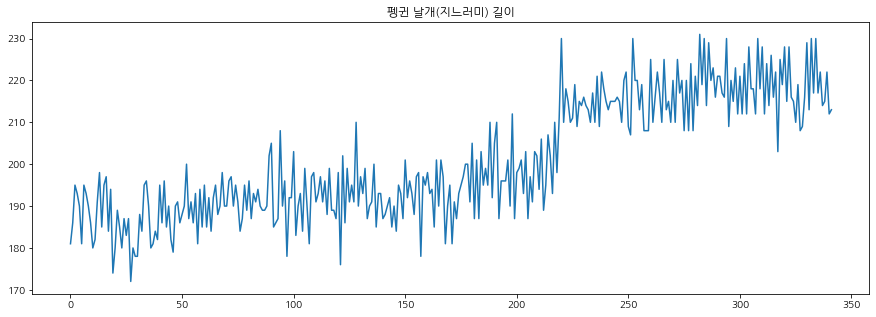

In [16]:
df1['flipper_length_mm'].plot(kind='line', figsize=(15,5), title='펭귄 날개(지느러미) 길이')

> **2. 바 (`bar`)**

In [17]:
bar_df = df1.groupby(df1.species).mean()
bar_df

,bill_length_mm,bill_depth_mm,flipper_length_mm
species,,,
Adelie,38.791391,18.346358,189.953642
Chinstrap,48.833824,18.420588,195.823529
Gentoo,47.504878,14.982114,217.186992


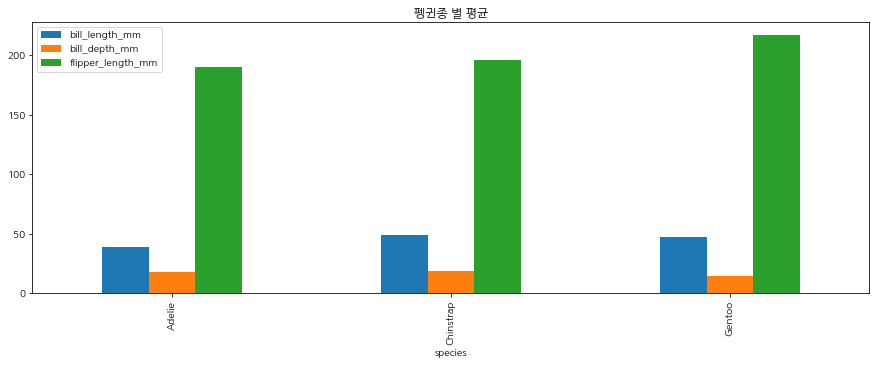

In [19]:
bar_df.plot(kind='bar', figsize=(15,5), title = '펭귄종 별 평균')

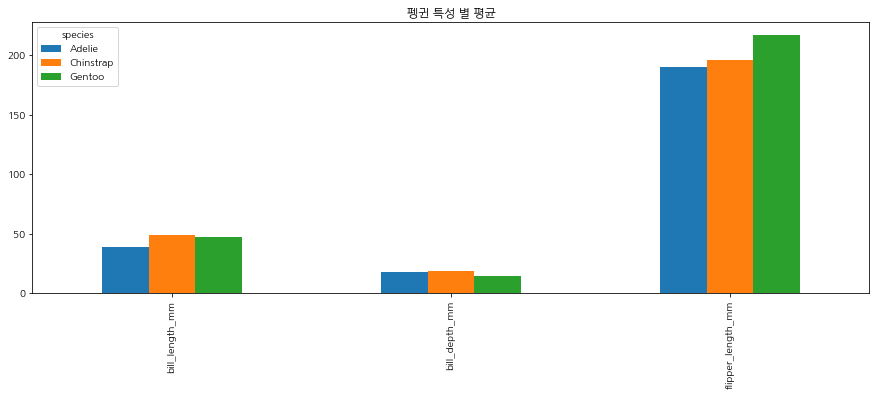

In [20]:
# 전치 연산
bar_df.T.plot(kind='bar', figsize=(15,5), title = '펭귄 특성 별 평균')

> **3. 히스토그램 (`hist`)**

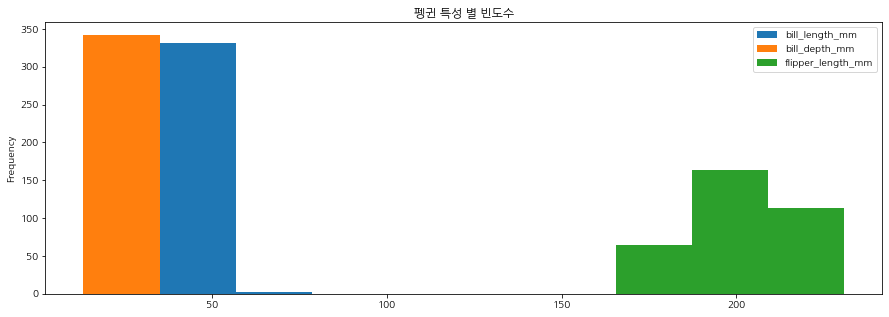

In [21]:
df1.plot(kind='hist', figsize=(15,5), title = '펭귄 특성 별 빈도수')

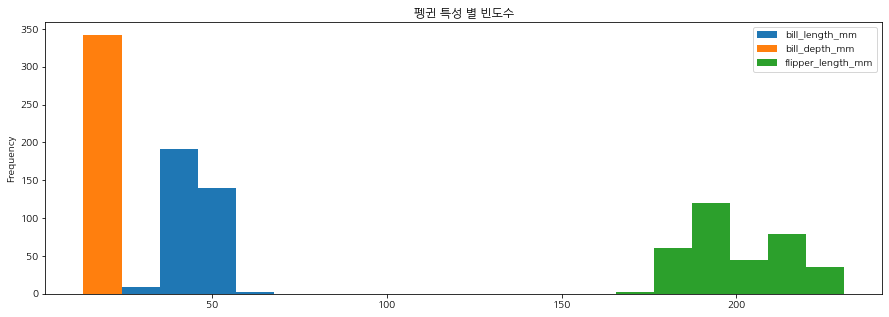

In [22]:
# 빈(bin) 개수 지정
df1.plot(bins=20, kind='hist', figsize=(15,5), title = '펭귄 특성 별 빈도수')

> **3. 박스 (`box`)**

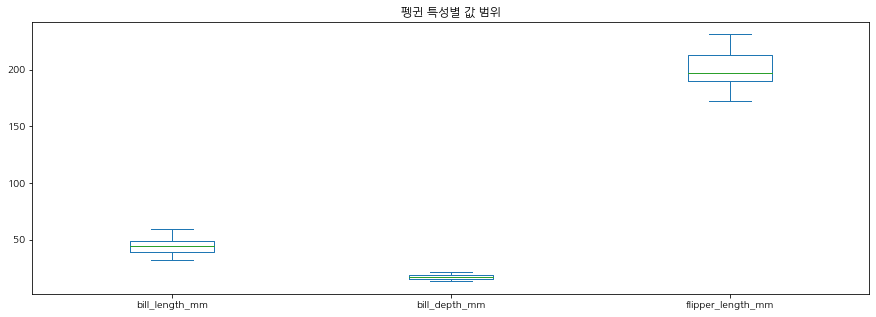

In [23]:
df1.plot(kind='box', figsize=(15,5), title = '펭귄 특성별 값 범위')

> **3. 파이 (`pie`)**

In [24]:
# 선실별 승객 수
pie_df = df2['pclass'].value_counts()

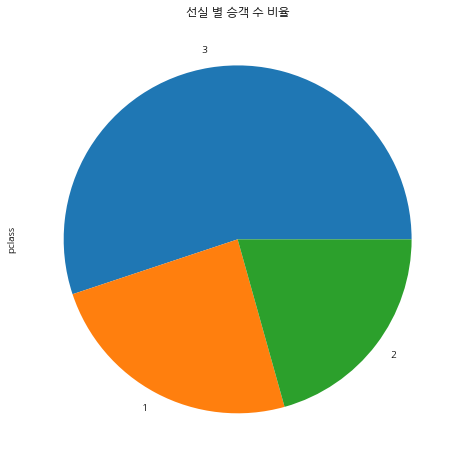

In [25]:
pie_df.plot(kind='pie', figsize=(15,8), title = '선실 별 승객 수 비율')

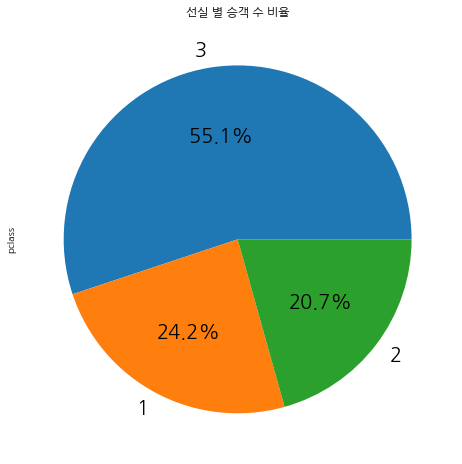

In [28]:
# 레이블 추가
pie_df.plot(kind='pie', figsize=(15,8), title = '선실 별 승객 수 비율', autopct='%.1f%%', fontsize=20)

> **4. 산점도 (`scatter`)**

In [ ]:
df2.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

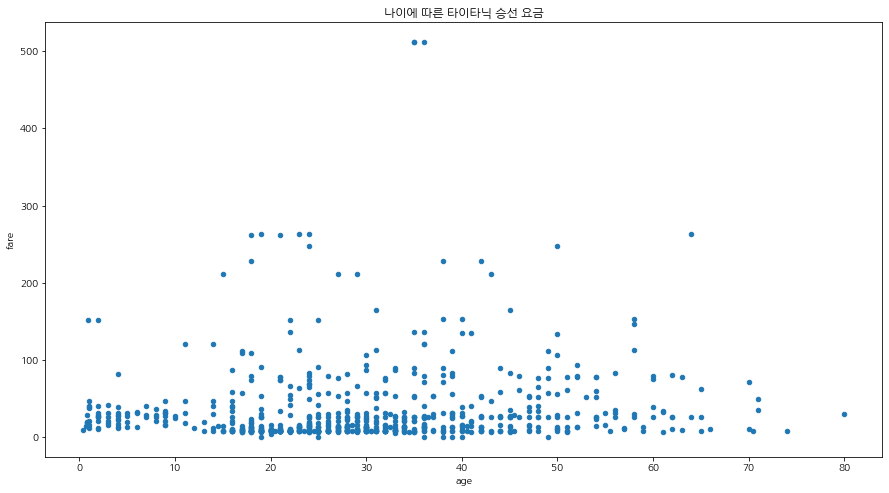

In [ ]:
# 나이에 따른 타이타닉 승선 요금 시각화
df2.plot(kind='scatter', figsize=(15,8) , x='age', y='fare', title='나이에 따른 타이타닉 승선 요금')

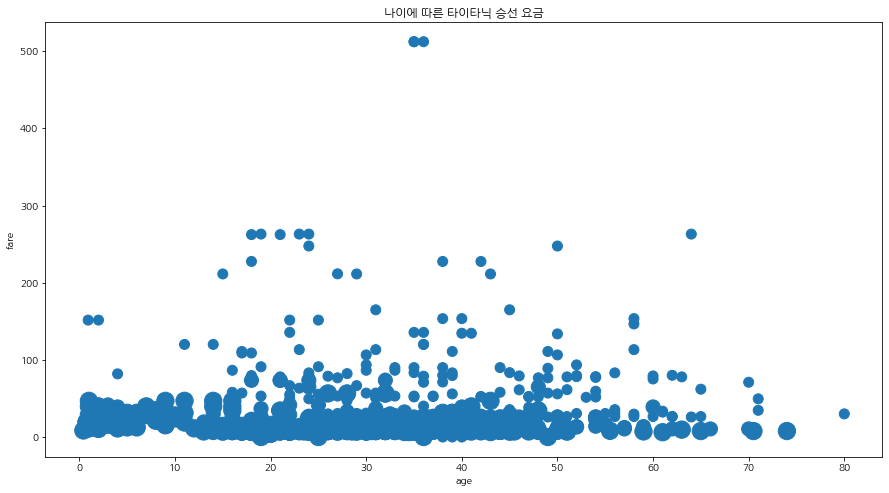

In [ ]:
# 버블차트 (선실 정보 추가)
df2.plot(kind='scatter', figsize=(15,8) , x='age', y='fare', title='나이에 따른 타이타닉 승선 요금', s=df2['pclass']*100)